Regression Models - "Diamond Price Prediction"

In [37]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [39]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
from xgboost import XGBRegressor

In [43]:
data_df = pd.read_csv("diamonds.csv")
data_df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
9734,9735,1.00,Fair,F,VS2,68.4,58.0,4656,5.97,6.10,4.13
43434,43435,0.53,Ideal,E,SI1,61.4,56.0,1415,5.21,5.24,3.21
9305,9306,1.00,Very Good,H,SI1,62.4,58.0,4574,6.37,6.42,3.99
13985,13986,1.16,Very Good,D,SI1,61.8,58.0,5695,6.72,6.78,4.17
41600,41601,0.24,Very Good,F,VS1,62.9,59.0,393,3.95,3.97,2.49


In [45]:
# Checking for missing values and categorical variables in the dataset
data_df.info

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

       

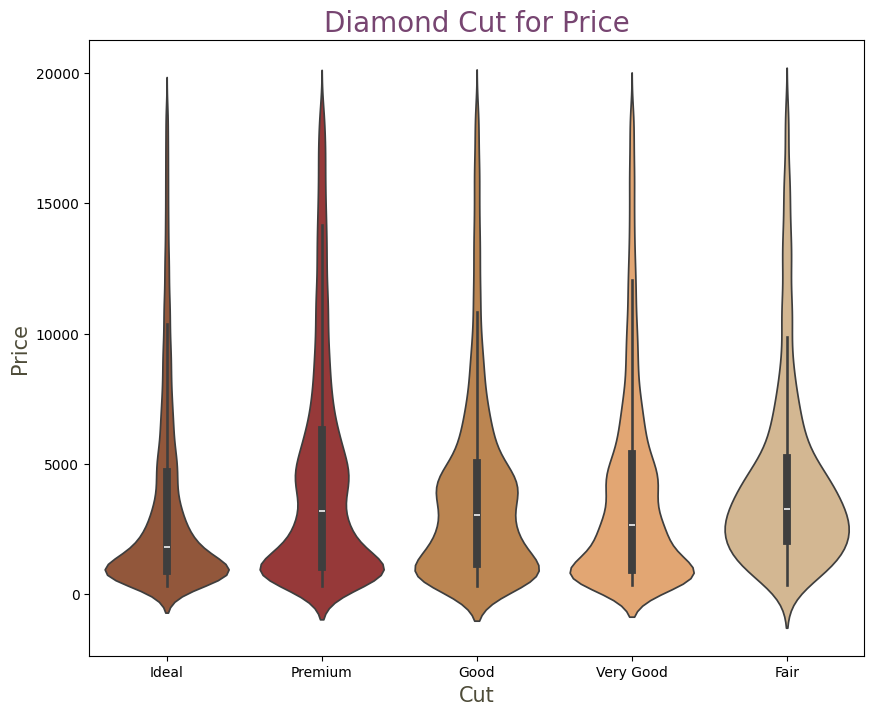

In [47]:
# Evaluating categorical features
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data_df, palette=cols, scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color = "#4e4c39", fontsize = 15)
plt.show()


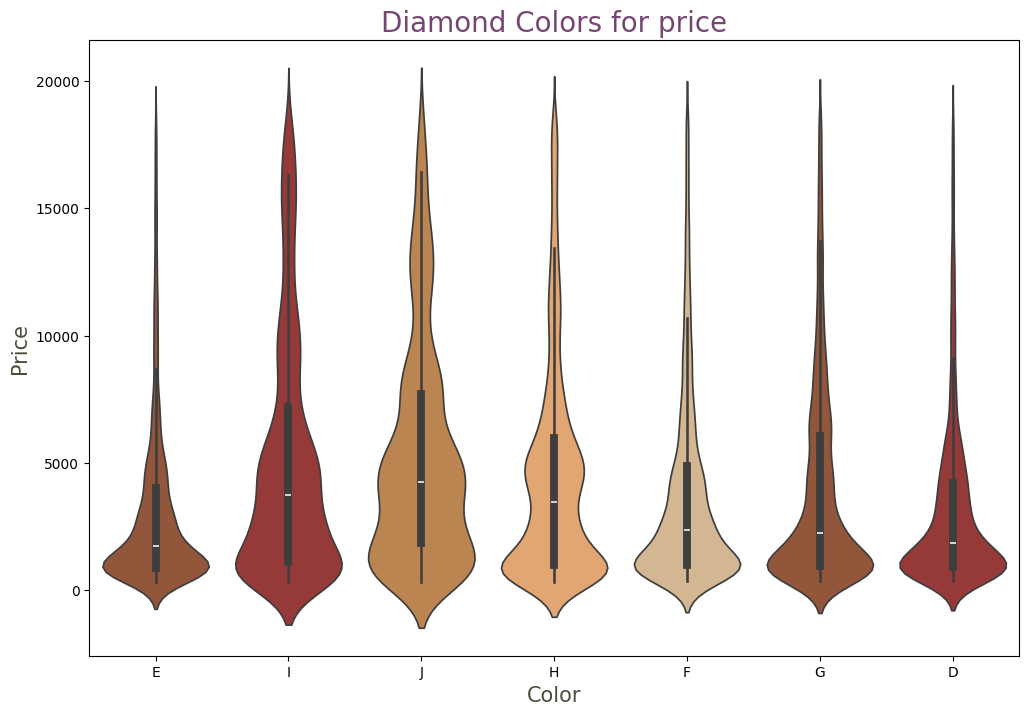

In [49]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='color', y='price', data=data_df, palette=cols, scale='count')
ax.set_title("Diamond Colors for price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

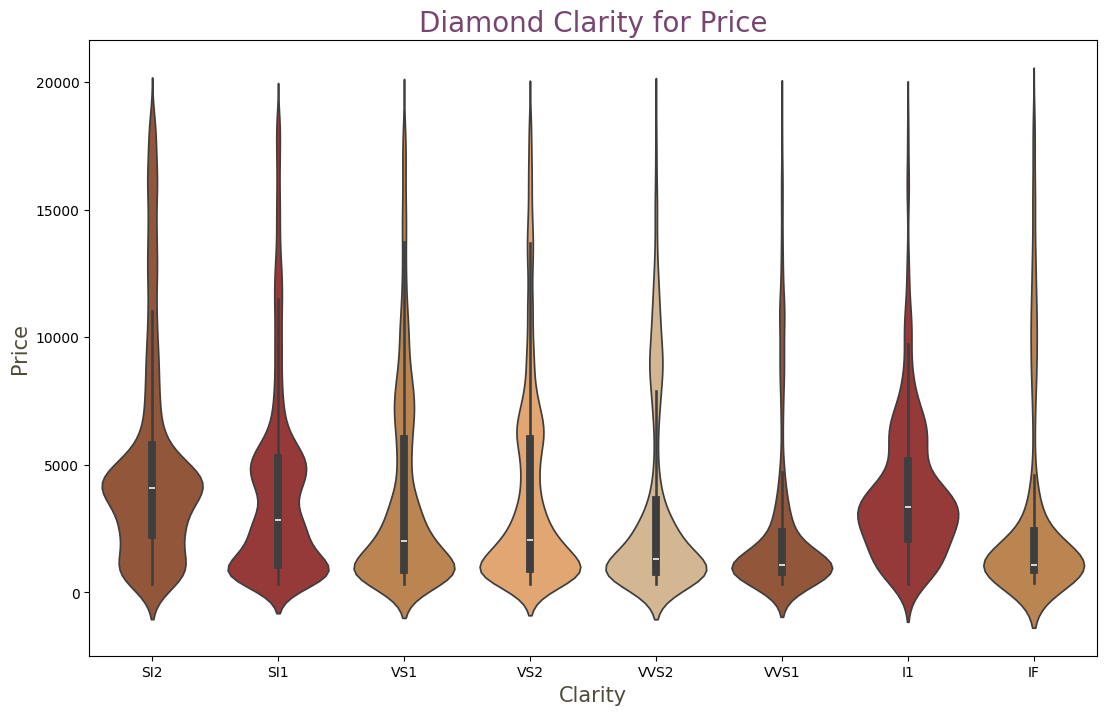

In [51]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity", y="price", data=data_df, palette=cols,scale="count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

In [53]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


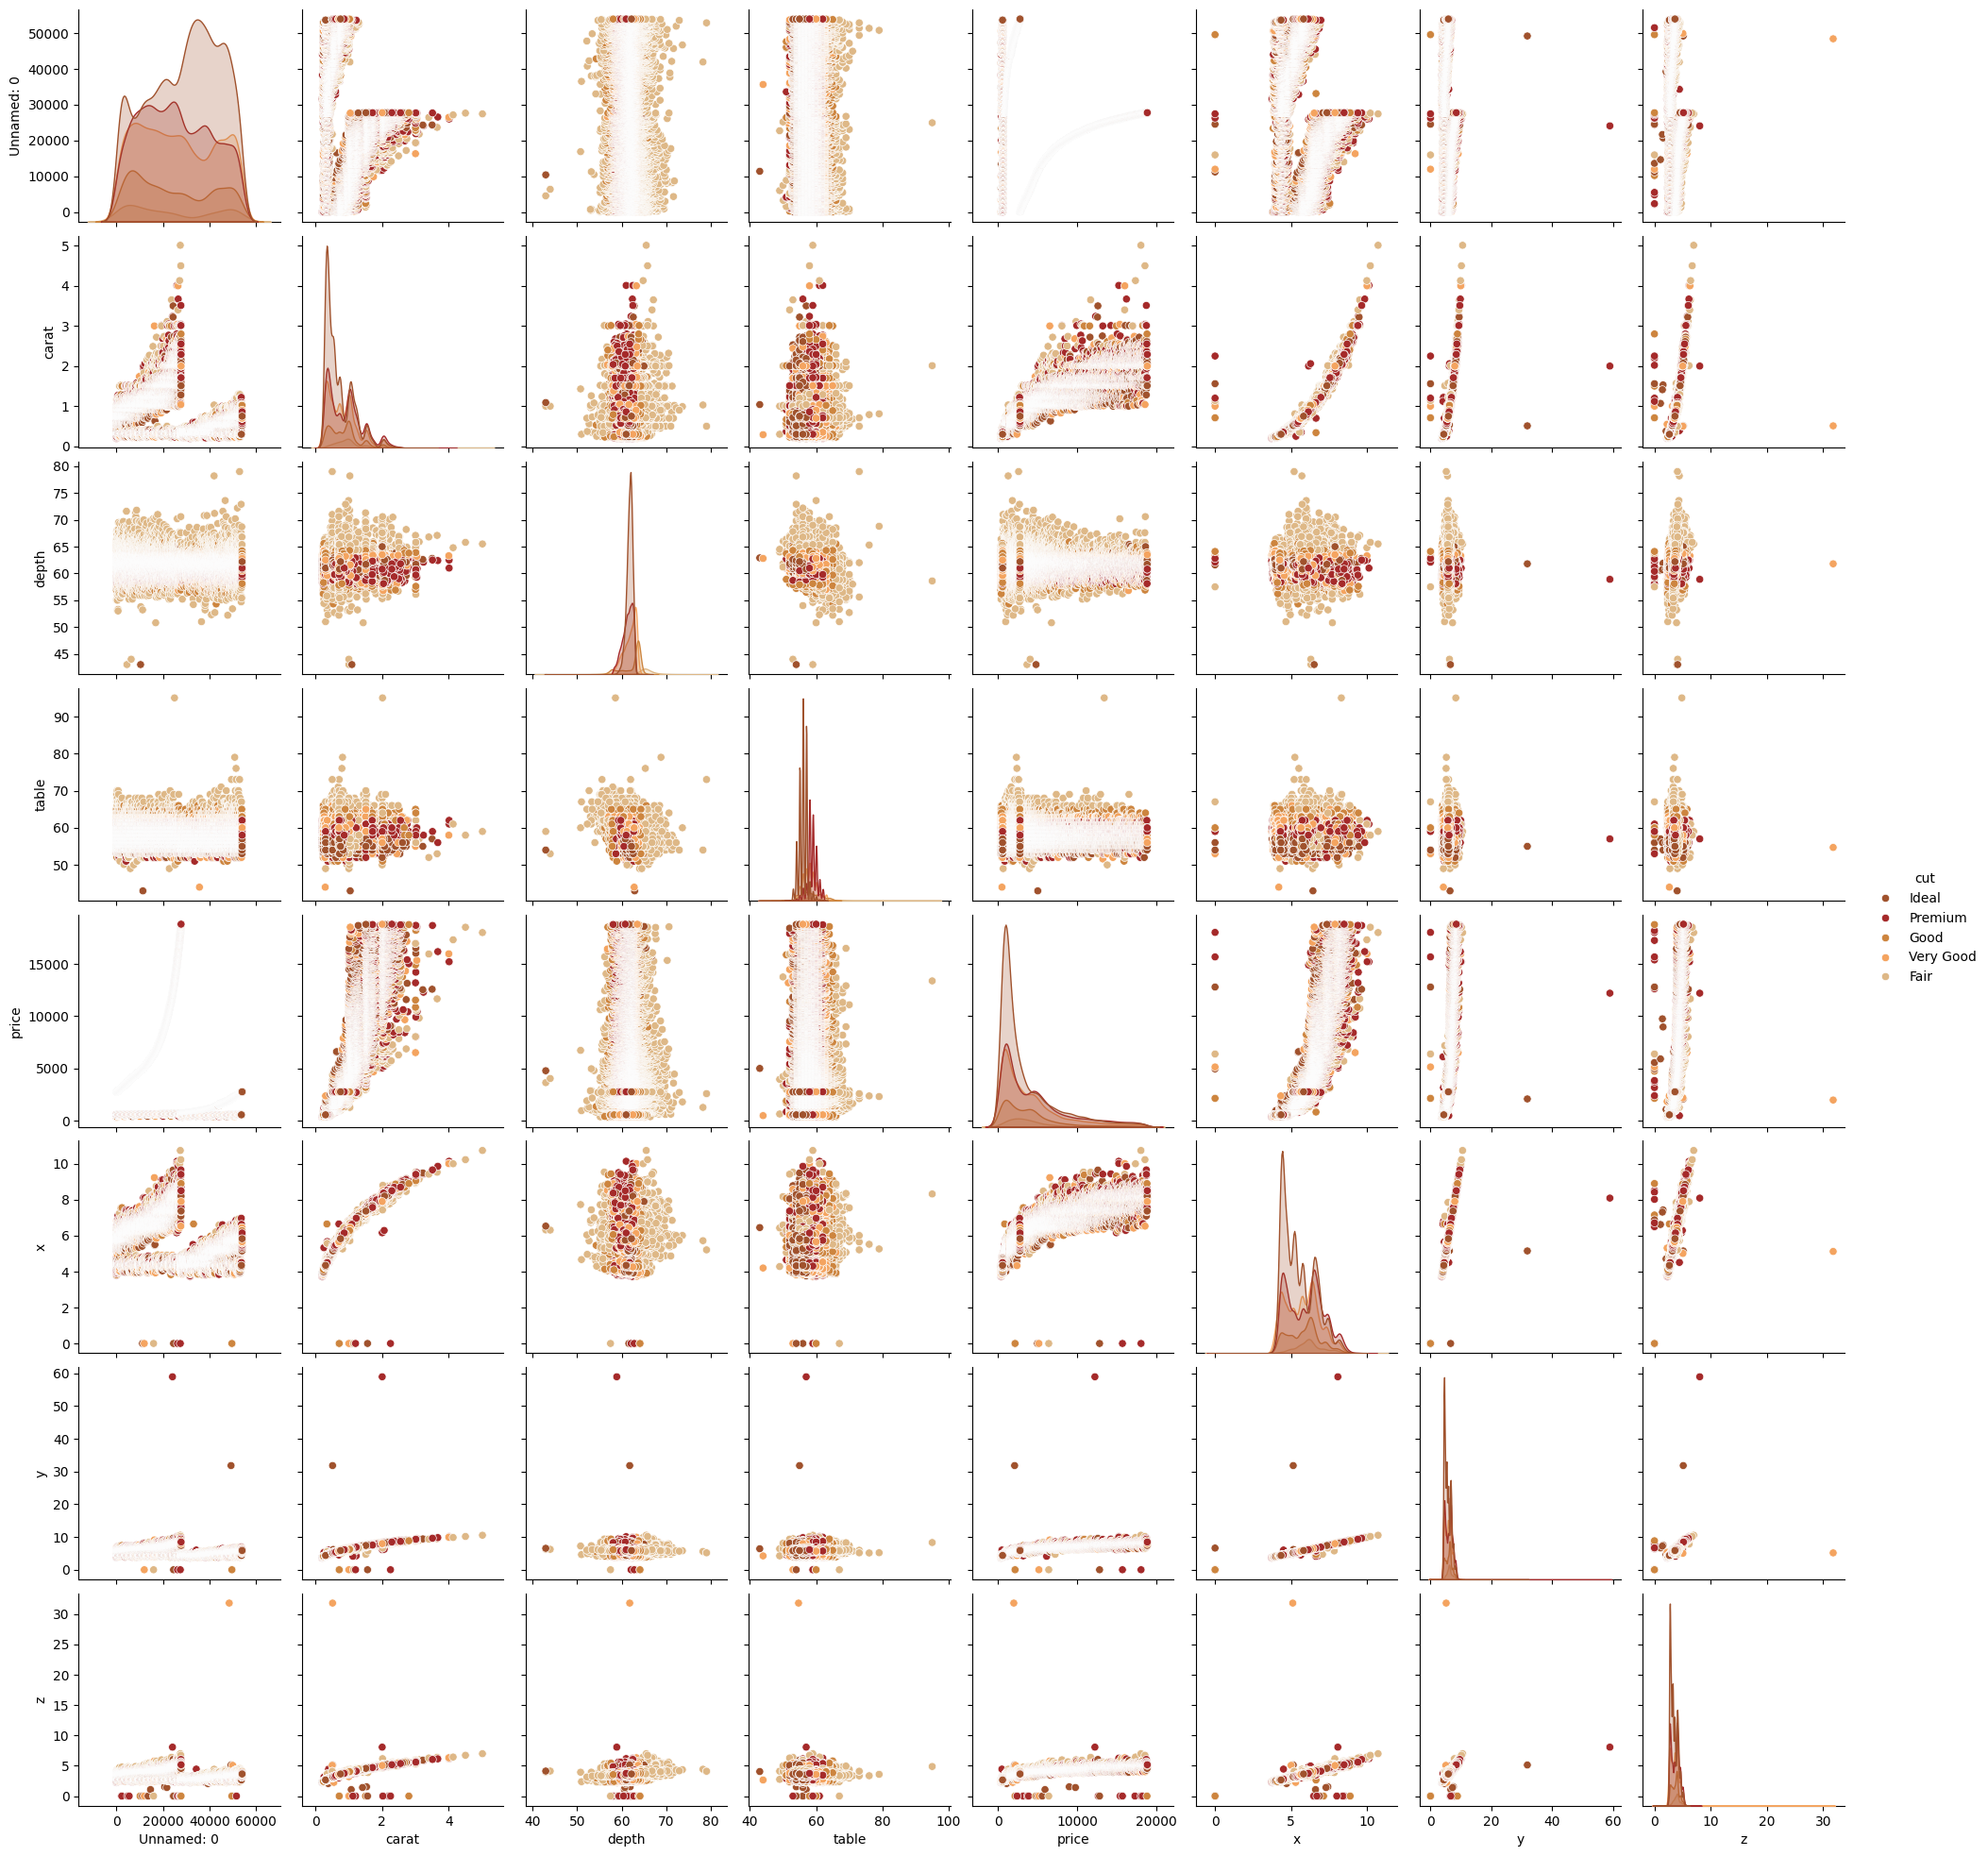

In [55]:
#Doing Bivariate Analysis by examaning a pairplot  
ax = sns.pairplot(data=data_df, hue="cut", palette = cols)
plt.show()

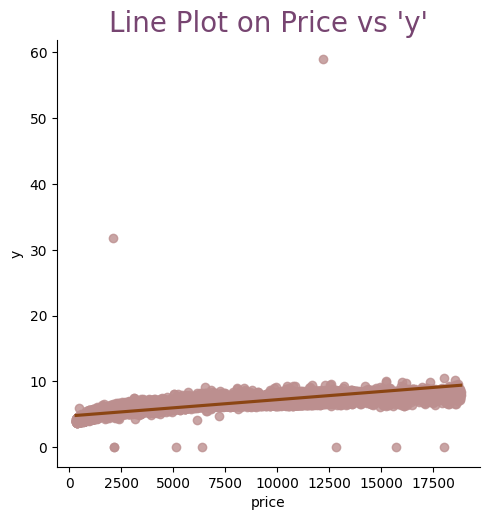

In [56]:
# Checking for Potential Outliers
lm = sns.lmplot(x="price", y="y", data=data_df, scatter_kws={"color" : "#BC8F8F"}, line_kws={"color" : "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

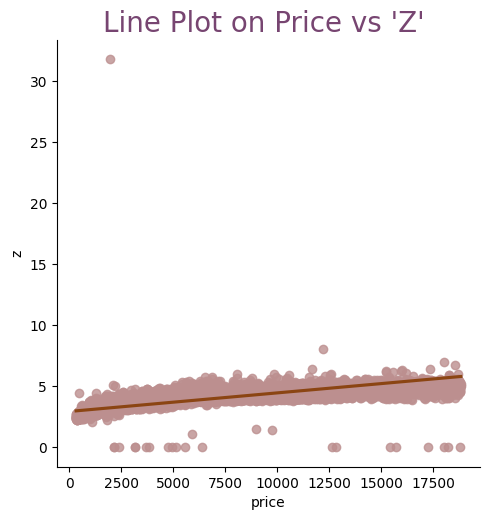

In [57]:
lm = sns.lmplot(x="price", y="z", data=data_df, scatter_kws={"color" : "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Z' ", color="#774571", fontsize = 20)
plt.show

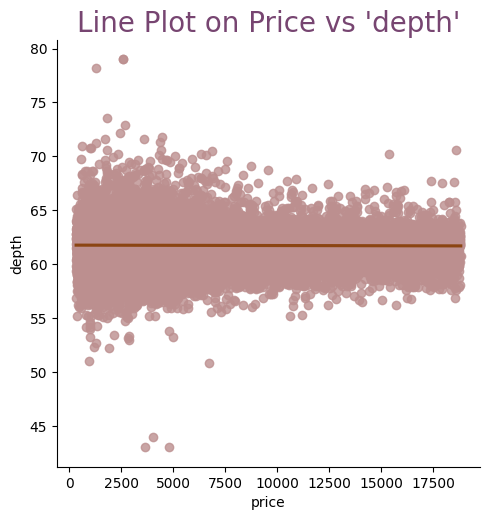

In [58]:
lm = sns.lmplot(x="price", y="depth", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

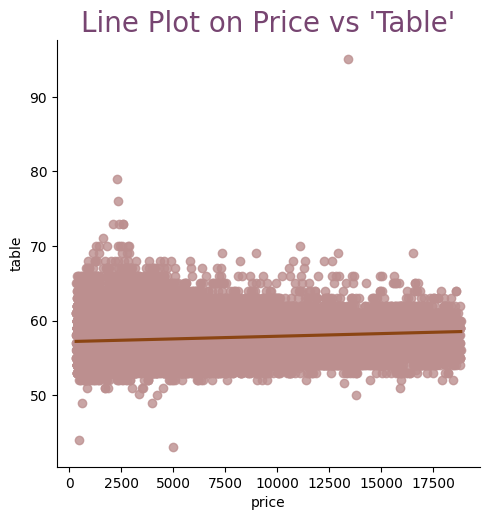

In [59]:
lm = sns.lmplot(x="price", y="table", data=data_df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [60]:
# Data Cleaning
#Removing the feature "Unnamed"
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.shape

(53940, 10)

In [61]:
# Removing the datapoints having min 0 value in either x, y or z features 
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.shape

(53920, 10)

In [62]:
# Removing outliers
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across-
# -features data_df = data_df[(data_df["depth"]<75)&(data_df["depth"]>45)]
data_df = data_df[(data_df["table"]<80)&(data_df["table"]>40)]
data_df = data_df[(data_df["x"]<40)]
data_df = data_df[(data_df["y"]<40)]
data_df = data_df[(data_df["z"]<40)&(data_df["z"]>2)]
data_df.shape

(53915, 10)

In [63]:
# Making a copy to keep original data in its form intact
data1 = data_df.copy()
# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()    

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53915.000000,53915.000000,53915.000000,53915.000000,53915.000000,53915.000000,53915.000000,53915.000000,53915.000000,53915.000000
mean,0.797623,2.553148,2.593953,3.835556,61.749663,57.456246,3930.426152,5.731458,5.733776,3.540060
std,0.473741,1.027684,1.701294,1.724571,1.432265,2.228249,3986.950895,1.119322,1.116844,0.702076
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,79.000000,18823.000000,10.740000,31.800000,31.800000


<Axes: >

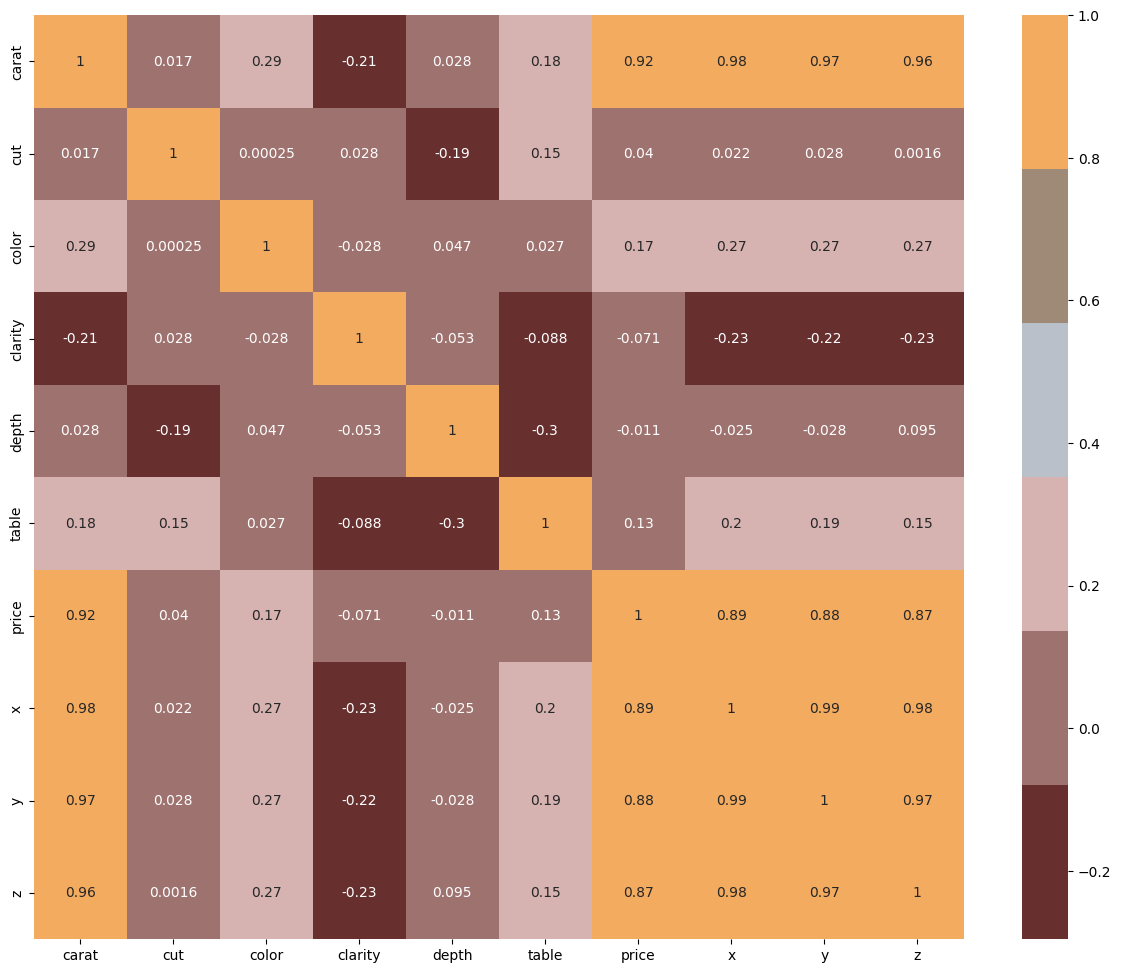

In [64]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78","#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

In [65]:
# Defining the independent and dependent variables
x= data1.drop(["price"],axis = 1)
y= data1["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=25)  

In [66]:
# Building pipelins of standard scaler and model for varios regressors.
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                        ("lasso", Lasso())])

pipeline_dt=Pipeline([("scalar3", StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])

pipeline_kn=Pipeline([("Scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6", StandardScaler()),
                      ("xgb", XGBRegressor())])

# List of all the pipelines

pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)


In [71]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1527.545560 
Lasso: 1424.305872 
DecisionTree: 736.198989 
RandomForest: 546.933867 
KNeighbors: 818.832290 
XGBRegressor: 547.264424 


In [81]:
#Model prediction on test data with XGBClassifier which gave us the least RMSE
pred = pipeline_xgb.predict(x_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

R^2: 0.9811751178358801
Adjusted R^2: 0.9811593911172801
